# Atelier ACP - LOUKIL TAREK
une agence de conseil financier collabore avec un ensemble d'entreprises, dans le but de leurs offrir des analyses rapides pour leurs études annuelles.

En effet, chaque fin d’année, elle collecte toutes les informations concernant les états financiers des entreprises afin de préparer pour chacune un bilan détaillé et concis, et ce en se basant sur les indicateurs suivants :
FD : flux de trésorerie / dette totale,
RA : résultat net / actif,
AD : actif à court terme / dette à court terme,
AV : actif à court terme / ventes. 
Le directeur financier vous a fourni le fichier entreprise.txt présentant les différentes valeurs des indicateurs cités ci-dessus de 46 entreprises et il vous demande de préparer un rapport
qui doit contenir une étude statistique sur chaque type d’entreprises, argumentée par une analyse plus convaincante, aboutissants à détecter les indicateurs les plus pertinents sur la santé financière de chaque entreprise. 

# Importation des librairies

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram




from sklearn import decomposition
from sklearn import preprocessing


# Chargement des données

In [2]:
# import de l'échantillon
data = pd.read_table("entreprises.txt")

#apprentissage non supervisé
X = data.drop(columns=["ET"])
X = X.fillna(X.mean())
X


Ent    FD    RA    AD    AV
0     1 -0.45 -0.41  1.09  0.45
1     2 -0.56 -0.31  1.51  0.16
2     3  0.06  0.02  1.01  0.40
3     4 -0.07 -0.09  1.45  0.26
4     5 -0.10 -0.09  1.45  0.26
5     6 -0.14 -0.07  0.71  0.28
6     7  0.04  0.01  1.50  0.71
7     8 -0.07 -0.06  1.37  0.40
8     9  0.07 -0.01  1.37  0.40
9    10 -1.14 -1.14  1.42  0.43
10   11 -0.23 -0.30  0.33  0.18
11   12  0.07  0.02  1.31  0.25
12   13  0.01  0.00  2.15  0.70
13   14 -0.28 -0.23  1.19  0.66
14   15  0.15  0.05  1.88  0.27
15   16  0.37  0.11  1.99  0.38
16   17 -0.08 -0.08  1.51  0.42
17   18  0.05  0.03  1.68  0.95
18   19  0.01  0.00  1.26  0.60
19   20  0.12  0.11  1.14  0.17
20   21 -0.28 -0.27  1.27  0.51
21   22  0.51  0.10  2.49  0.54
22   23  0.08  0.02  2.01  0.53
23   24  0.38  0.11  3.27  0.35
24   25  0.19  0.05  2.25  0.33
25   26  0.32  0.07  4.24  0.63
26   27  0.31  0.05  4.45  0.69
27   28  0.12  0.05  2.52  0.69
28   29 -0.02  0.02  2.05  0.35
29   30  0.22  0.08  2.35  0.40
30   31  0.17  0.07  1.80  0.52
31   32  0.15  0.05  2.17  0.55
32   33 -0.10 -0.01  2.50  0.58
33   34  0.14 -0.03  0.46  0.26
34   35  0.14  0.07  2.61  0.52
35   36  0.15  0.60  2.23  0.56
36   37  0.16  0.05  2.31  0.20
37   38  0.29  0.06  1.84  0.38
38   39  0.54  0.11  2.33  0.48
39   40 -0.33 -0.09  3.01  0.47
40   41  0.48  0.09  1.24  0.18
41   42  0.56  0.11  4.29  0.44
42   43  0.20  0.08  1.99  0.30
43   44  0.47  0.14  2.92  0.45
44   45  0.17  0.04  2.45  0.14
45   46  0.58  0.04  5.06  0.13

In [3]:
# Pour accélérer les calculs (complexité temporelle)
# On va passer à numpy

Xnum = X.values

Xnum


array([[ 1.00e+00, -4.50e-01, -4.10e-01,  1.09e+00,  4.50e-01],
       [ 2.00e+00, -5.60e-01, -3.10e-01,  1.51e+00,  1.60e-01],
       [ 3.00e+00,  6.00e-02,  2.00e-02,  1.01e+00,  4.00e-01],
       [ 4.00e+00, -7.00e-02, -9.00e-02,  1.45e+00,  2.60e-01],
       [ 5.00e+00, -1.00e-01, -9.00e-02,  1.45e+00,  2.60e-01],
       [ 6.00e+00, -1.40e-01, -7.00e-02,  7.10e-01,  2.80e-01],
       [ 7.00e+00,  4.00e-02,  1.00e-02,  1.50e+00,  7.10e-01],
       [ 8.00e+00, -7.00e-02, -6.00e-02,  1.37e+00,  4.00e-01],
       [ 9.00e+00,  7.00e-02, -1.00e-02,  1.37e+00,  4.00e-01],
       [ 1.00e+01, -1.14e+00, -1.14e+00,  1.42e+00,  4.30e-01],
       [ 1.10e+01, -2.30e-01, -3.00e-01,  3.30e-01,  1.80e-01],
       [ 1.20e+01,  7.00e-02,  2.00e-02,  1.31e+00,  2.50e-01],
       [ 1.30e+01,  1.00e-02,  0.00e+00,  2.15e+00,  7.00e-01],
       [ 1.40e+01, -2.80e-01, -2.30e-01,  1.19e+00,  6.60e-01],
       [ 1.50e+01,  1.50e-01,  5.00e-02,  1.88e+00,  2.70e-01],
       [ 1.60e+01,  3.70e-01,  1.10e-01,

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(Xnum)
Xss

array([[-1.69479805, -1.67359529, -1.7513691 , -0.94411456,  0.14380111],
       [-1.61947369, -2.02454399, -1.3057774 , -0.52276336, -1.46822139],
       [-1.54414933, -0.04646949,  0.16467519, -1.02437193, -0.13413381],
       [-1.46882498, -0.46122705, -0.32547567, -0.58295639, -0.91235157],
       [-1.39350062, -0.55694033, -0.32547567, -0.58295639, -0.91235157],
       [-1.31817626, -0.68455804, -0.23635733, -1.32533707, -0.8011776 ],
       [-1.2428519 , -0.11027835,  0.12011602, -0.53279554,  1.58906266],
       [-1.16752754, -0.46122705, -0.19179816, -0.66321376, -0.13413381],
       [-1.09220319, -0.01456506,  0.03099768, -0.66321376, -0.13413381],
       [-1.01687883, -3.87500079, -5.00418848, -0.61305291,  0.03262714],
       [-0.94155447, -0.97169789, -1.26121823, -1.70655959, -1.35704743],
       [-0.86623011, -0.01456506,  0.16467519, -0.72340679, -0.96793855],
       [-0.79090576, -0.20599163,  0.07555685,  0.1192956 ,  1.53347568],
       [-0.7155814 , -1.13122003, -0.9

In [5]:
matrice_covariance = np.cov(Xss.T)

In [6]:
from numpy.linalg import eig

In [7]:
matrice_covariance.shape


(5, 5)

In [8]:
(valeurs_propres,vecteurs_propres) = eig(matrice_covariance)

In [9]:
valeurs_propres

array([2.71033449, 1.07384566, 0.78933262, 0.38979329, 0.14780505])

In [10]:
vecteurs_propres

array([[ 0.48685772,  0.13125372, -0.42038702,  0.75432327, -0.00362993],
       [ 0.55637868,  0.12638715,  0.29360302, -0.21392091,  0.73654882],
       [ 0.50165889,  0.04974389,  0.59515078, -0.0037697 , -0.62581566],
       [ 0.44607475, -0.24466746, -0.5962151 , -0.57869173, -0.22538543],
       [ 0.05261178, -0.95103214,  0.16551474,  0.22435667,  0.12263291]])

In [11]:
pourcentage_informations = valeurs_propres/valeurs_propres.sum() *100
pourcentage_informations

array([53.02828342, 21.01002387, 15.44346435,  7.62639042,  2.89183794])

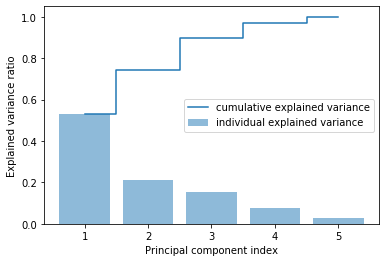

In [12]:
tot = sum(valeurs_propres)
var_exp = [(i / tot) for i in sorted(valeurs_propres, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,6), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,6), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


# Configurations : analyse statistique et visualtisations

In [13]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

# Application de l'ACP

In [14]:
# choix du nombre de composantes à calculer
n_comp = 3


from sklearn.decomposition import PCA
pca = PCA(n_comp)

Xacp = pca.fit_transform(Xss)

In [15]:
Xss.shape

(46, 5)

In [16]:
Xacp.shape

(46, 3)

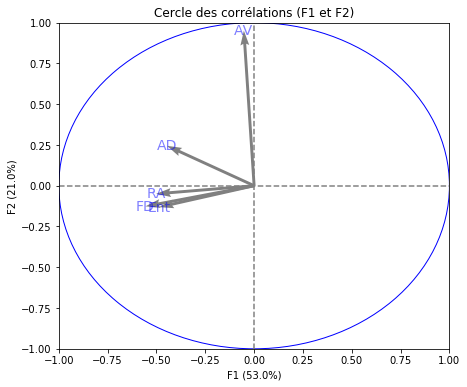

In [17]:
#Etude des variables

pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(X.columns))

plt.show()

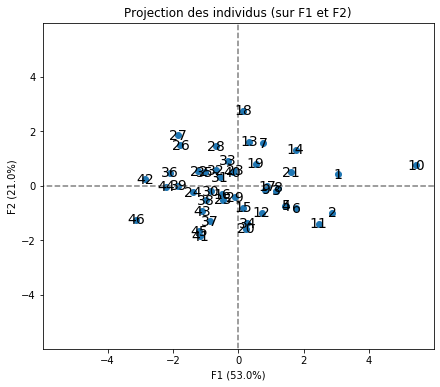

In [18]:
#Etude des individus

display_factorial_planes(Xacp, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(X["Ent"]))

plt.show()
